Question 1:
Random Number Generator, lcg, seed set.

In [1]:
def randomNumber(lowerLimit, upperLimit,k):
    seed = 0
    m = 100
    a = 21
    c = 49
    y = seed
    for i in range(k):
        y = (y*a+c) % m
    y = y*(upperLimit-lowerLimit)/100+ lowerLimit
    
    return y

Question 2: Input Modelling

a) customer_arrivals.csv, val and train sets

In [136]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import xlabel, ylabel, title
from random import expovariate

In [97]:
with open('customer_arrivals.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)

customer_arrivals = []
for element in range(0,len(your_list)):
    changed = float(your_list[element][0])
    customer_arrivals.append(changed)

In [98]:
customer_inter_arrivals = []
for i in range(1, len(customer_arrivals)):
    customer_inter_arrivals.append(customer_arrivals[i]-customer_arrivals[i-1])


The customer_inter_arrival list is separated into two sublists where the analysis one is made of 80% of the main list and the 20% that's left is the validation list.

In [124]:
customer_inter_arrivals_analysis = customer_inter_arrivals[:math.floor(80/100*len(customer_inter_arrivals))]

In [126]:
customer_inter_arrivals_val = customer_inter_arrivals[math.floor(80/100*len(customer_inter_arrivals)):]

b) Visualization of the analysis data. 

Text(0.5, 1.0, 'Visualization of the analysis data')

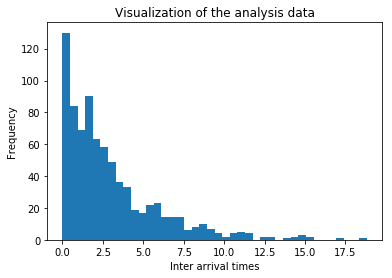

In [132]:
histt = plt.hist(customer_inter_arrivals_analysis, bins=40)
xlabel('Inter arrival times')
ylabel('Frequency')
title('Visualization of the analysis data')

As seen in the histogram above, the data follows an exponential distribution. 

c) Exponential distribution is the chosen prametric distribution. A parametric model will be fitted.

d) The parameters of the parametric distribution.

In [133]:
exponential_lambda = len(customer_inter_arrivals_analysis)/sum(customer_inter_arrivals_analysis)

In [134]:
exponential_lambda

0.3347536271959042

In [152]:
exponential_data = [expovariate(exponential_lambda) for x in range(len(customer_inter_arrivals_analysis))]

Text(0.5, 1.0, 'Visualization of data from exponential distribution')

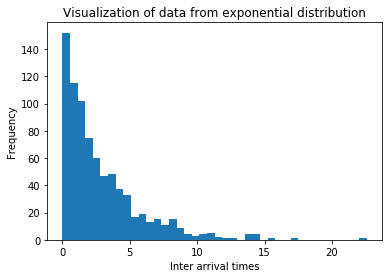

In [153]:
histt = plt.hist(exponential_data, bins=40)
xlabel('Inter arrival times')
ylabel('Frequency')
title('Visualization of data from exponential distribution')

As viewed from the two graphs above, they are quite similar which confirms the choice of the appropriate probability distribution. 

e) The simulation from assignment 2 is used for this part and is fixed regarding these probability distributions.